# Table of Content
01. Import Libraries
02. Import Data
03. Create and Export Visualizations: 
- (Q1) What are the busiest days of the week and hours of the day?
- (Q2) Any particular times of the day when people spend the most money?

# 01. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Adjust the setting to view all columns in this notebook
pd.options.display.max_columns = None

# 02. Import Data

In [3]:
# Define the main folder project path
path = r'C:\Users\saich\Desktop\CareerFoundry\Data Immersion\Achievement 4 Python Fundamentals for Data Analysts\04-2023 Instacart Basket Analysis (github)'

In [4]:
# Import 'orders_products_all_flagged' data set from 'Prepared Data' folder
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_flagged.pkl'))

In [5]:
ords_prods_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_order_interval,order_frequency_flag,gender,state,age,date_joined,dependant_counts,family_status,income,_merge,region,customer_profile,income_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regular busy,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regular busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regular busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income


In [6]:
ords_prods_all.shape

(32399732, 34)

# 03. Create and Export Visualizations

### (Q1) What are the busiest days of the week and hours of the day?
- 01. Bar chart: no of orders vs order_day_of_week
- 02. Bar chart: no of orders vs order_hour_of_day

#### Q1_01. Bar chart: no of orders vs order_day_of_week

In [7]:
# Find the number of orders across 'order_day_of_week' 
ords_prods_all['order_day_of_week'].value_counts(dropna = False).sort_index()

0    6203329
1    5659298
2    4213105
3    3839865
4    3783172
5    4205076
6    4495887
Name: order_day_of_week, dtype: int64

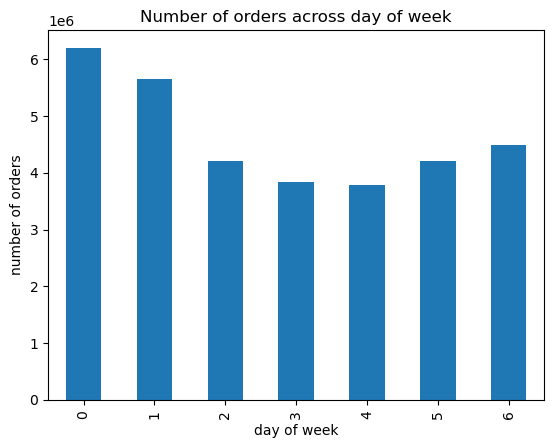

In [8]:
# Create a bar chart based on the frequency table above
bar_order_count_vs_order_day_of_week = ords_prods_all['order_day_of_week'].value_counts(dropna = False).sort_index().plot.bar(title = 'Number of orders across day of week', xlabel = 'day of week', ylabel = 'number of orders')

In [9]:
# Export bar_order_count_vs_order_day_of_week
bar_order_count_vs_order_day_of_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q1', 'Q1_01 (bar) order_count vs order_day_of_week.png'))

#### Q1_02. Bar chart: no of orders vs order_hour_of_day

In [10]:
# Find the number of orders across 'order_hour_of_day'
ords_prods_all['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      218742
1      115683
2       69360
3       51268
4       53232
5       87944
6      290450
7      890923
8     1717863
9     2453842
10    2761333
11    2735694
12    2618104
13    2660570
14    2688728
15    2661718
16    2534744
17    2087273
18    1636226
19    1258076
20     976000
21     795528
22     634159
23     402272
Name: order_hour_of_day, dtype: int64

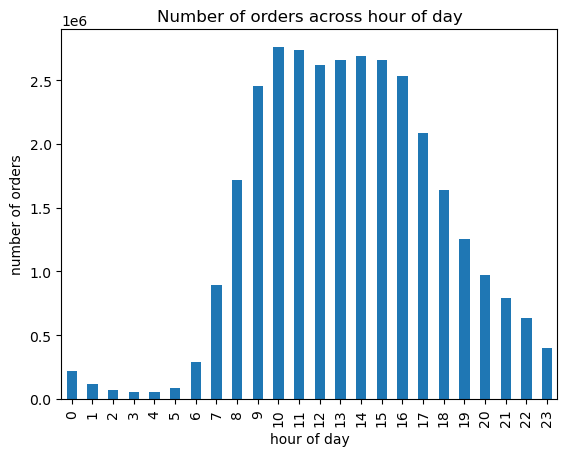

In [11]:
# Create a bar chart based on the frequency table above
bar_order_count_vs_order_hour_of_day = ords_prods_all['order_hour_of_day'].value_counts(dropna = False).sort_index().plot.bar(title = 'Number of orders across hour of day', xlabel = 'hour of day', ylabel = 'number of orders')

In [12]:
# Export bar_order_count_vs_order_hour_of_day
bar_order_count_vs_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q1', 'Q1_02 (bar) order_count vs order_hour_of_day.png'))

### (Q2) Any particular times of the day when people spend the most money?
- 01. Line chart: prices vs order_day_of_week
- 02. Line chart: prices vs order_hour_of_day
- 03. Percentage stacked bar chart: price_range vs order_hour_of_day for Saturday (day 0)
- 04. Percentage stacked bar chart: price_range vs order_hour_of_day for Sunday (day 1)
- 05. Percentage stacked bar chart: price_range vs order_hour_of_day for Monday (day 2)
- 06. Percentage stacked bar chart: price_range vs order_hour_of_day for Tuesday (day 3)
- 07. Percentage stacked bar chart: price_range vs order_hour_of_day for Wednesday (day 4)
- 08. Percentage stacked bar chart: price_range vs order_hour_of_day for Thursday (day 5)
- 09. Percentage stacked bar chart: price_range vs order_hour_of_day for Friday (day 6)

#### Create a sampling data for the first two line charts

In [13]:
# 1. Set the random seed to use
np.random.seed(4)

In [14]:
# 2. Create a list 'dev' that contains True/False values with a ratio of 70/30 and has the same length as 'ords_prods_all' dataframe
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [15]:
# 3. Create the big sample that holds 70% of data using the True values of 'dev' list
big = ords_prods_all[dev]

In [16]:
# 4. Create the small sample that holds 30% of data using the False values of 'dev' list
small = ords_prods_all[~dev]

In [17]:
# 5. Check the sampling data with expectation
len(ords_prods_all)

32399732

In [18]:
len(big) + len(small)

32399732

In [19]:
len(big) / len(ords_prods_all)

0.7000095864990489

In [20]:
len(small) / len(ords_prods_all)

0.2999904135009512

In [21]:
# 6. Create a smaller dataframe that contains only required columns for the line charts
small_df = ords_prods_all[['order_day_of_week', 'order_hour_of_day', 'prices']]

#### Q2_01. Line chart: prices vs order_day_of_week

Text(0, 0.5, 'prices')

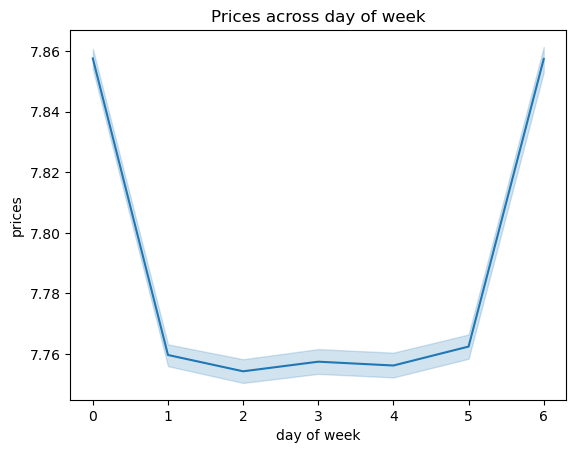

In [22]:
# Using the 'small_df' dataframe, create the line chart of 'prices' against 'order_day_of_week'
line_prices_vs_order_day_of_week = sns.lineplot(data = small_df, x = 'order_day_of_week', y = 'prices')
line_prices_vs_order_day_of_week.set_title('Prices across day of week')
line_prices_vs_order_day_of_week.set_xlabel('day of week')
line_prices_vs_order_day_of_week.set_ylabel('prices')

In [23]:
# Export line_prices_vs_order_day_of_week
line_prices_vs_order_day_of_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q2', 'Q2_01 (line) prices vs order_day_of_week.png'))

#### Q2_02. Line chart: prices vs order_hour_of_day

Text(0, 0.5, 'prices')

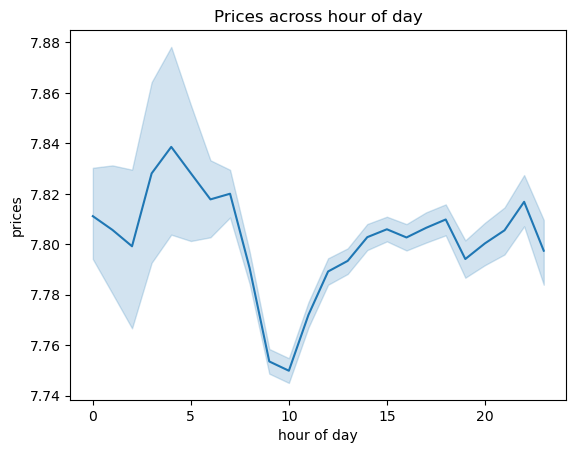

In [24]:
# Using the small_df, create the line chart of 'prices' against 'order_hour_of_day'
line_prices_vs_order_hour_of_day = sns.lineplot(data = small_df, x = 'order_hour_of_day', y = 'prices')
line_prices_vs_order_hour_of_day.set_title('Prices across hour of day')
line_prices_vs_order_hour_of_day.set_xlabel('hour of day')
line_prices_vs_order_hour_of_day.set_ylabel('prices')

In [25]:
# Export line_prices_vs_order_hour_of_day
line_prices_vs_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q2', 'Q2_02 (line) prices vs order_hour_of_day.png'))

#### Create sub-dataframe for each day of week

In [26]:
df_day_0_sat = ords_prods_all.loc[ords_prods_all['order_day_of_week'] == 0, ['order_id', 'order_day_of_week', 'order_hour_of_day', 'price_range']]

In [27]:
df_day_1_sun = ords_prods_all.loc[ords_prods_all['order_day_of_week'] == 1, ['order_id', 'order_day_of_week', 'order_hour_of_day', 'price_range']]

In [28]:
df_day_2_mon = ords_prods_all.loc[ords_prods_all['order_day_of_week'] == 2, ['order_id', 'order_day_of_week', 'order_hour_of_day', 'price_range']]

In [29]:
df_day_3_tue = ords_prods_all.loc[ords_prods_all['order_day_of_week'] == 3, ['order_id', 'order_day_of_week', 'order_hour_of_day', 'price_range']]

In [30]:
df_day_4_wed = ords_prods_all.loc[ords_prods_all['order_day_of_week'] == 4, ['order_id', 'order_day_of_week', 'order_hour_of_day', 'price_range']]

In [31]:
df_day_5_thu = ords_prods_all.loc[ords_prods_all['order_day_of_week'] == 5, ['order_id', 'order_day_of_week', 'order_hour_of_day', 'price_range']]

In [32]:
df_day_6_fri = ords_prods_all.loc[ords_prods_all['order_day_of_week'] == 6, ['order_id', 'order_day_of_week', 'order_hour_of_day', 'price_range']]

#### Create the crosstables of 'price_range' against 'order_hour_of_day' for each day of week

In [33]:
ct_price_range_vs_order_hour_of_day_sat = pd.crosstab(df_day_0_sat['order_hour_of_day'], df_day_0_sat['price_range'])
ct_price_range_vs_order_hour_of_day_sat

price_range,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,441,11915,26479
1,290,6848,15361
2,165,3925,8623
3,108,2755,5981
4,103,2635,5629
5,134,3546,7938
6,459,10724,23761
7,1920,40592,90717
8,4568,93210,208374


In [34]:
ct_price_range_vs_order_hour_of_day_sun = pd.crosstab(df_day_1_sun['order_hour_of_day'], df_day_1_sun['price_range'])
ct_price_range_vs_order_hour_of_day_sun

price_range,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,466,11555,25057
1,195,5767,12318
2,139,3400,7262
3,89,2184,4836
4,91,2458,5118
5,150,4494,9758
6,620,16456,35642
7,2083,51786,111390
8,3691,105849,223342


In [35]:
ct_price_range_vs_order_hour_of_day_mon = pd.crosstab(df_day_2_mon['order_hour_of_day'], df_day_2_mon['price_range'])
ct_price_range_vs_order_hour_of_day_mon

price_range,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,405,9318,20161
1,179,4601,9918
2,103,2607,5623
3,80,2149,4790
4,102,2112,4583
5,141,3962,8622
6,504,13654,29598
7,1510,38297,82528
8,2621,70352,150771


In [36]:
ct_price_range_vs_order_hour_of_day_tue = pd.crosstab(df_day_3_tue['order_hour_of_day'], df_day_3_tue['price_range'])
ct_price_range_vs_order_hour_of_day_tue

price_range,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,303,8651,18547
1,143,4265,9144
2,132,2780,5741
3,66,1749,3952
4,78,2101,4653
5,172,3549,8008
6,522,12575,27814
7,1287,34532,74764
8,2359,62674,133147


In [37]:
ct_price_range_vs_order_hour_of_day_wed = pd.crosstab(df_day_4_wed['order_hour_of_day'], df_day_4_wed['price_range'])
ct_price_range_vs_order_hour_of_day_wed

price_range,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,309,7701,16691
1,172,4192,9151
2,110,2536,5326
3,78,1936,4312
4,96,2183,4635
5,136,3771,8082
6,542,12368,26875
7,1383,35188,76811
8,2248,61077,130603


In [38]:
ct_price_range_vs_order_hour_of_day_thu = pd.crosstab(df_day_5_thu['order_hour_of_day'], df_day_5_thu['price_range'])
ct_price_range_vs_order_hour_of_day_thu

price_range,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,419,9245,19825
1,215,4605,10133
2,113,2987,6407
3,103,2545,5667
4,117,2595,6016
5,173,4572,9972
6,636,14374,31228
7,1611,39844,87267
8,2702,70461,150710


In [39]:
ct_price_range_vs_order_hour_of_day_fri = pd.crosstab(df_day_6_fri['order_hour_of_day'], df_day_6_fri['price_range'])
ct_price_range_vs_order_hour_of_day_fri

price_range,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,409,9775,21070
1,205,5675,12306
2,148,3550,7683
3,110,2477,5301
4,99,2423,5405
5,144,3320,7300
6,414,9751,21933
7,1670,35681,80062
8,3503,73125,162476


#### Convert the values of each crosstable into a percentage of each row

In [48]:
ct_percent_price_range_vs_order_hour_of_day_sat = ct_price_range_vs_order_hour_of_day_sat.div(ct_price_range_vs_order_hour_of_day_sat.sum(axis = 1), axis = 0)
ct_percent_price_range_vs_order_hour_of_day_sat

price_range,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,0.011356,0.306811,0.681833
1,0.012889,0.304369,0.682741
2,0.012979,0.308739,0.678282
3,0.012212,0.311511,0.676278
4,0.012310,0.314928,0.672762
5,0.011534,0.305216,0.683250
6,0.013135,0.306891,0.679974
7,0.014411,0.304678,0.680910
8,0.014921,0.304457,0.680623


In [49]:
ct_percent_price_range_vs_order_hour_of_day_sun = ct_price_range_vs_order_hour_of_day_sun.div(ct_price_range_vs_order_hour_of_day_sun.sum(axis = 1), axis = 0)
ct_percent_price_range_vs_order_hour_of_day_sun

price_range,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,0.012568,0.311640,0.675792
1,0.010667,0.315481,0.673851
2,0.012869,0.314786,0.672345
3,0.012519,0.307216,0.680264
4,0.011869,0.320595,0.667536
5,0.010415,0.312040,0.677545
6,0.011761,0.312151,0.676088
7,0.012604,0.313363,0.674033
8,0.011088,0.317978,0.670934


In [50]:
ct_percent_price_range_vs_order_hour_of_day_mon = ct_price_range_vs_order_hour_of_day_mon.div(ct_price_range_vs_order_hour_of_day_mon.sum(axis = 1), axis = 0)
ct_percent_price_range_vs_order_hour_of_day_mon

price_range,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,0.013552,0.311806,0.674642
1,0.012179,0.313036,0.674786
2,0.012360,0.312853,0.674787
3,0.011398,0.306169,0.682433
4,0.015007,0.310725,0.674268
5,0.011081,0.311356,0.677564
6,0.011518,0.312049,0.676433
7,0.012343,0.313050,0.674607
8,0.011714,0.314431,0.673855


In [51]:
ct_percent_price_range_vs_order_hour_of_day_tue = ct_price_range_vs_order_hour_of_day_tue.div(ct_price_range_vs_order_hour_of_day_tue.sum(axis = 1), axis = 0)
ct_percent_price_range_vs_order_hour_of_day_tue

price_range,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,0.011018,0.314570,0.674412
1,0.010552,0.314714,0.674734
2,0.015255,0.321276,0.663469
3,0.011444,0.303277,0.685278
4,0.011417,0.307523,0.681060
5,0.014665,0.302583,0.682752
6,0.012759,0.307375,0.679866
7,0.011638,0.312272,0.676089
8,0.011903,0.316248,0.671849


In [52]:
ct_percent_price_range_vs_order_hour_of_day_wed = ct_price_range_vs_order_hour_of_day_wed.div(ct_price_range_vs_order_hour_of_day_wed.sum(axis = 1), axis = 0)
ct_percent_price_range_vs_order_hour_of_day_wed

price_range,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,0.012510,0.311769,0.675722
1,0.012727,0.310174,0.677100
2,0.013798,0.318113,0.668088
3,0.012330,0.306039,0.681631
4,0.013885,0.315736,0.670379
5,0.011344,0.314538,0.674118
6,0.013623,0.310871,0.675506
7,0.012198,0.310349,0.677453
8,0.011592,0.314947,0.673461


In [53]:
ct_percent_price_range_vs_order_hour_of_day_thu = ct_price_range_vs_order_hour_of_day_thu.div(ct_price_range_vs_order_hour_of_day_thu.sum(axis = 1), axis = 0)
ct_percent_price_range_vs_order_hour_of_day_thu

price_range,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,0.014209,0.313507,0.672285
1,0.014378,0.307965,0.677657
2,0.011886,0.314190,0.673924
3,0.012387,0.306073,0.681539
4,0.013405,0.297319,0.689276
5,0.011755,0.310661,0.677584
6,0.013755,0.310870,0.675375
7,0.012515,0.309535,0.677949
8,0.012069,0.314736,0.673194


In [54]:
ct_percent_price_range_vs_order_hour_of_day_fri = ct_price_range_vs_order_hour_of_day_fri.div(ct_price_range_vs_order_hour_of_day_fri.sum(axis = 1), axis = 0)
ct_percent_price_range_vs_order_hour_of_day_fri

price_range,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,0.013086,0.312760,0.674154
1,0.011272,0.312053,0.676674
2,0.013004,0.311923,0.675072
3,0.013945,0.314021,0.672033
4,0.012489,0.305664,0.681847
5,0.013378,0.308436,0.678187
6,0.012898,0.303788,0.683314
7,0.014223,0.303893,0.681884
8,0.014651,0.305829,0.679520


#### Q2_03. Percentage stacked bar chart: price_range vs order_hour_of_day for Saturday (day 0)

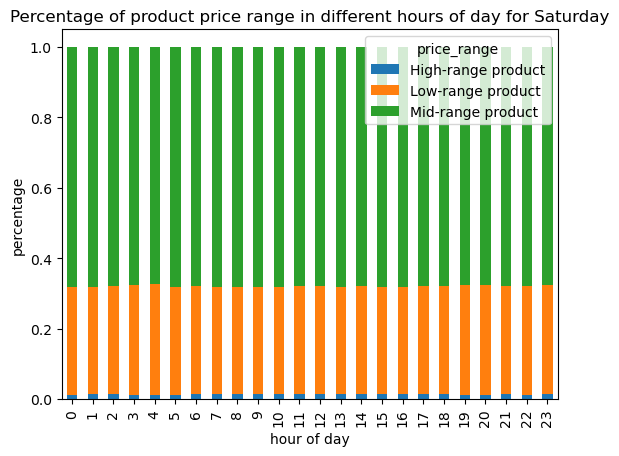

In [55]:
# Create the percentage stacked bar chart of price_range vs order_hour_of_day for Saturday
percent_bar_price_range_vs_order_hour_of_day_sat = ct_percent_price_range_vs_order_hour_of_day_sat.plot.bar(stacked = True, title = 'Percentage of product price range in different hours of day for Saturday', xlabel = 'hour of day', ylabel = 'percentage')

In [56]:
# Export percent_bar_price_range_vs_order_hour_of_day_sat
percent_bar_price_range_vs_order_hour_of_day_sat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q2', 'Q2_03 (percent bar) price_range vs order_hour_of_day_sat.png'))

#### Q2_04. Percentage stacked bar chart: price_range vs order_hour_of_day for Sunday (day 1)

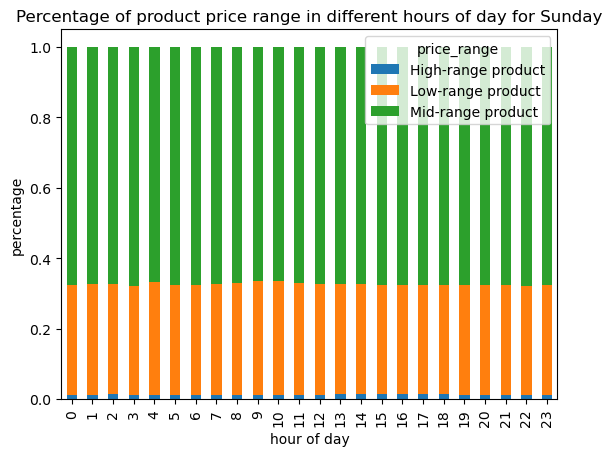

In [57]:
# Create the percentage stacked bar chart of price_range vs order_hour_of_day for Sunday
percent_bar_price_range_vs_order_hour_of_day_sun = ct_percent_price_range_vs_order_hour_of_day_sun.plot.bar(stacked = True, title = 'Percentage of product price range in different hours of day for Sunday', xlabel = 'hour of day', ylabel = 'percentage')

In [58]:
# Export percent_bar_price_range_vs_order_hour_of_day_sun
percent_bar_price_range_vs_order_hour_of_day_sun.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q2', 'Q2_04 (percent bar) price_range vs order_hour_of_day_sun.png'))

#### Q2_05. Percentage stacked bar chart: price_range vs order_hour_of_day for Monday (day 2)

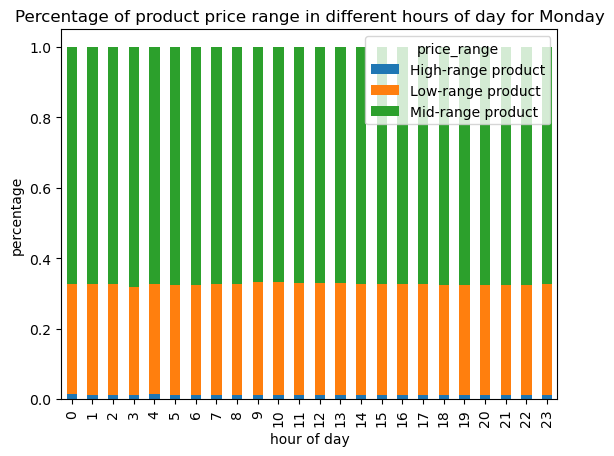

In [59]:
# Create the percentage stacked bar chart of price_range vs order_hour_of_day for Monday
percent_bar_price_range_vs_order_hour_of_day_mon = ct_percent_price_range_vs_order_hour_of_day_mon.plot.bar(stacked = True, title = 'Percentage of product price range in different hours of day for Monday', xlabel = 'hour of day', ylabel = 'percentage')

In [61]:
# Export percent_bar_price_range_vs_order_hour_of_day_mon
percent_bar_price_range_vs_order_hour_of_day_mon.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q2', 'Q2_05 (percent bar) price_range vs order_hour_of_day_mon.png'))

#### Q2_06. Percentage stacked bar chart: price_range vs order_hour_of_day for Tuesday (day 3)

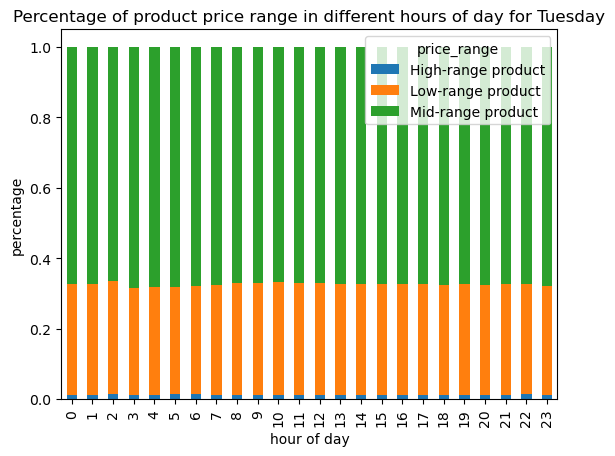

In [62]:
percent_bar_price_range_vs_order_hour_of_day_tue = ct_percent_price_range_vs_order_hour_of_day_tue.plot.bar(stacked = True, title = 'Percentage of product price range in different hours of day for Tuesday', xlabel = 'hour of day', ylabel = 'percentage')

In [63]:
# Export percent_bar_price_range_vs_order_hour_of_day_tue
percent_bar_price_range_vs_order_hour_of_day_tue.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q2', 'Q2_06 (percent bar) price_range vs order_hour_of_day_tue.png'))

#### Q2_07. Percentage stacked bar chart: price_range vs order_hour_of_day for Wednesday (day 4)

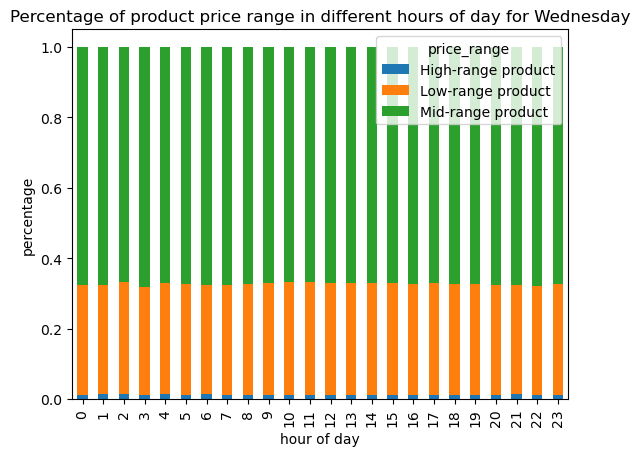

In [64]:
percent_bar_price_range_vs_order_hour_of_day_wed = ct_percent_price_range_vs_order_hour_of_day_wed.plot.bar(stacked = True, title = 'Percentage of product price range in different hours of day for Wednesday', xlabel = 'hour of day', ylabel = 'percentage')

In [65]:
# Export percent_bar_price_range_vs_order_hour_of_day_wed
percent_bar_price_range_vs_order_hour_of_day_wed.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q2', 'Q2_07 (percent bar) price_range vs order_hour_of_day_wed.png'))

#### Q2_08. Percentage stacked bar chart: price_range vs order_hour_of_day for Thursday (day 5)

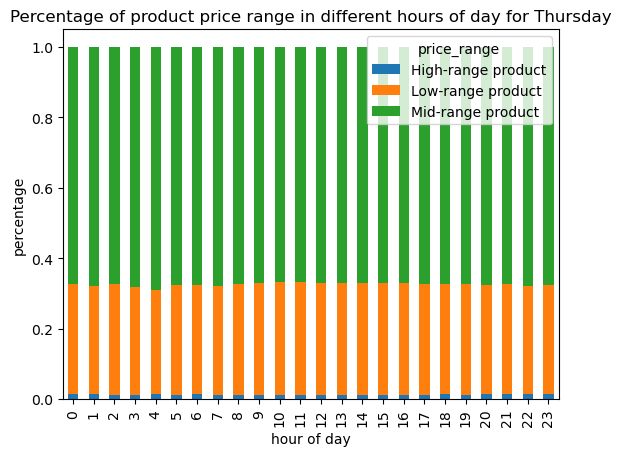

In [66]:
percent_bar_price_range_vs_order_hour_of_day_thu = ct_percent_price_range_vs_order_hour_of_day_thu.plot.bar(stacked = True, title = 'Percentage of product price range in different hours of day for Thursday', xlabel = 'hour of day', ylabel = 'percentage')

In [67]:
# Export percent_bar_price_range_vs_order_hour_of_day_thu
percent_bar_price_range_vs_order_hour_of_day_thu.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q2', 'Q2_08 (percent bar) price_range vs order_hour_of_day_thu.png'))

#### Q2_09. Percentage stacked bar chart: price_range vs order_hour_of_day for Friday (day 6)

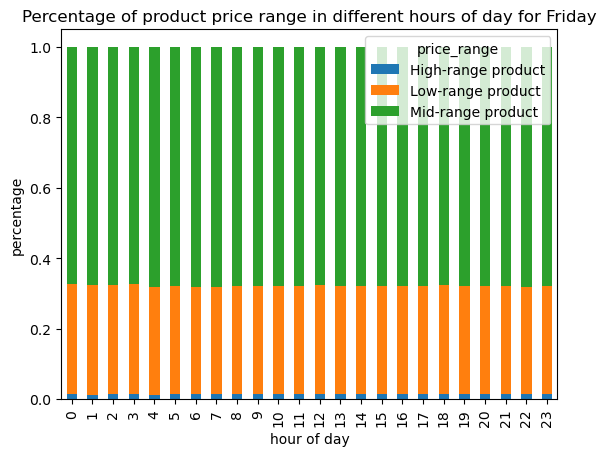

In [68]:
percent_bar_price_range_vs_order_hour_of_day_fri = ct_percent_price_range_vs_order_hour_of_day_fri.plot.bar(stacked = True, title = 'Percentage of product price range in different hours of day for Friday', xlabel = 'hour of day', ylabel = 'percentage')

In [69]:
# Export percent_bar_price_range_vs_order_hour_of_day_fri
percent_bar_price_range_vs_order_hour_of_day_fri.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q2', 'Q2_09 (percent bar) price_range vs order_hour_of_day_fri.png'))